In [1]:
# I am not sure I entirely understand the given methods. So in Verma and Lewis method
# we go through every single row and see how a bit flip would affect it.
# But we do not multiply the quadratic coefficients by 2. 
# In examples the quadratic coefficients are always twice smaller in a 
# QUBO row as there will be another instance of the same coefficient, just in a different row.
# So 6x1x6 will be a 3 in row 1 and a 3 in row 6, but when they are added together, they will make a 6.

In [2]:
import sys
import neal
import greedy
import tabu
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path
current_path = Path().resolve()
sys.path.append(str(current_path / '../code/'))
from experiment import Experiment
from table import Table

# Load data

In [3]:
data_folder = '../data/Multidimensional Knapsack/'
# Weish dataset has smallers problebls, WEING has larger problems.
# We have Weish[01-30] files in Weish folder. Load them.
weish_files_no = 30
weish_file_paths = ['weish//Weish'+ str(i).zfill(2) +'.npz' for i in range(1, weish_files_no + 1)]
weish_loaded_files = [np.load(data_folder + i) for i in weish_file_paths]
# We have WEING[1-8] files in Weing folder. Load them.
weing_files_no = 8
weing_file_paths = ['weing//WEING'+ str(i) +'.npz' for i in range(1, weing_files_no + 1)]
weing_loaded_files = [np.load(data_folder + i) for i in weing_file_paths]
# Merge the datasets and get the needed information.
loaded_files = weish_loaded_files + weing_loaded_files
qubo_sizes = [i['n'] for i in loaded_files]
objectives = [i['objective'] for i in loaded_files]
constraints = [i['constraint'] for i in loaded_files]

# Prepare data

In [4]:
QUBOs, penalties, obj_qubos, obj_constants, con_qubos, con_constants = Experiment.data_prep(qubo_sizes, objectives, constraints, 'Monotone', monotone_value=10)
repeats = 10

## Greedy

In [5]:
greedy_sampler = greedy.SteepestDescentSampler()
greedy_runs = Experiment.run_sampler(QUBOs, obj_qubos, obj_constants, con_qubos, con_constants, 
                                     greedy_sampler, repeats, num_reads=100)

100.0 %


## Simulated Annealing

In [6]:
# Less reads to compensate the run time
sa_sampler = neal.SimulatedAnnealingSampler()
sa_runs = Experiment.run_sampler(QUBOs, obj_qubos, obj_constants, con_qubos, con_constants, 
                                 sa_sampler, repeats, num_reads=10)

100.0 %


## Tabu

In [7]:
tabu_sampler = tabu.TabuSampler()
tabu_runs = Experiment.run_sampler(QUBOs, obj_qubos, obj_constants, con_qubos, con_constants, 
                                   tabu_sampler, repeats, timeout=20)

100.0 %


## Record the results

In [8]:
greedy_results = Table.record_results(greedy_runs, qubo_sizes, penalties, repeats)
sa_results = Table.record_results(sa_runs, qubo_sizes, penalties, repeats)
tabu_results = Table.record_results(tabu_runs, qubo_sizes, penalties, repeats)
    
# Display the first repetition table
rep = 0
Table.display_side_by_side(greedy_results[rep], sa_results[rep], tabu_results[rep], titles=['Greedy', 'SA', 'Tabu'])

,Size,Penalty,Objective Function,Broken Constraints,Energy (minimisation)
0,85,10,2796,20,-2596
1,85,10,2885,10,-2785
2,90,10,2055,65,-1405
3,85,10,2879,330,421
4,90,10,2016,12,-1896
5,100,10,4778,179,-2988
6,100,10,4051,10,-3951
7,100,10,3619,81,-2809
8,100,10,4252,325,-1002
9,110,10,2582,85,-1732


## Analyse results

In [9]:
# Show total energies of all tries in all problems in a single df
energies_greedy = Table.columns_to_table(greedy_results, 'Energy (minimisation)')
energies_sa = Table.columns_to_table(sa_results, 'Energy (minimisation)')
energies_tabu = Table.columns_to_table(tabu_results, 'Energy (minimisation)')

energies_tabu

,Energy (minimisation) 0,Energy (minimisation) 1,Energy (minimisation) 2,Energy (minimisation) 3,Energy (minimisation) 4,Energy (minimisation) 5,Energy (minimisation) 6,Energy (minimisation) 7,Energy (minimisation) 8,Energy (minimisation) 9
0,-733,24,-1117,-610,-924,-1150,-1791,-891,-1969,-1364
1,-341,-342,1075,-608,-1437,-58,2314,3920,-521,1169
2,4447,-2328,-2947,-1446,-1759,-2878,-1067,-1269,-2827,-1145
3,8454,3898,-2391,6714,5315,8950,-608,-2268,3308,2943
4,-1467,-195,-1056,-1205,-1023,-2153,-1961,-1367,-2784,2345
5,1882,4018,-123,-1047,574,580,-366,6492,2428,3585
6,-245,-2025,-245,-1918,-2485,-525,55,-245,-144,2754
7,1375,-1203,2497,735,710,14527,17083,2113,4876,4249
8,-823,797,-992,-974,-1222,-1700,-1394,6257,-1483,-2339
9,-1026,2027,-1456,15619,-2346,1515,9950,-182,-1285,-2407


In [10]:
# Show number of broken constraints of all tries in all problems in a single df
broken_constraints_greedy = Table.columns_to_table(greedy_results, 'Broken Constraints')
broken_constraints_sa = Table.columns_to_table(sa_results, 'Broken Constraints')
broken_constraints_tabu = Table.columns_to_table(tabu_results, 'Broken Constraints')

broken_constraints_greedy

,Broken Constraints 0,Broken Constraints 1,Broken Constraints 2,Broken Constraints 3,Broken Constraints 4,Broken Constraints 5,Broken Constraints 6,Broken Constraints 7,Broken Constraints 8,Broken Constraints 9
0,20,12,52,6,26,78,61,38,122,14
1,10,67,105,12,14,67,90,121,46,40
2,65,1,61,296,52,60,76,16,104,114
3,330,39,115,189,173,50,74,15,40,271
4,12,33,94,347,159,241,85,73,93,45
5,179,138,82,1,78,115,112,39,193,16
6,10,65,17,0,25,40,5,14,24,104
7,81,50,3,14,153,44,40,70,25,5
8,325,230,342,72,237,116,10,336,254,73
9,85,207,115,285,145,117,446,161,230,6


In [11]:
# Show feasible solutions
feasible_full_greedy = Table.feasibility_table(greedy_results)
feasible_full_sa = Table.feasibility_table(sa_results)
feasible_full_tabu = Table.feasibility_table(tabu_results)

feasible_full_tabu

,Feasible 0,Feasible 1,Feasible 2,Feasible 3,Feasible 4,Feasible 5,Feasible 6,Feasible 7,Feasible 8,Feasible 9
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [12]:
# Calculate number of feasible solutions with mean and SD (in all runs)
feasible_greedy = Table.feasibility_statistic(greedy_results)
feasible_sa = Table.feasibility_statistic(sa_results)
feasible_tabu = Table.feasibility_statistic(tabu_results)

# Display the table
Table.display_side_by_side(feasible_greedy, feasible_sa, feasible_tabu, titles=['Greedy', 'SA', 'Tabu'])

,Feasible,Feasibility rate,Energy mean,Energy SD
0,0.000000,0.000000,-2.394000e+03,537.774219
1,0.000000,0.000000,-2.440800e+03,353.380752
2,0.000000,0.000000,-1.861900e+03,705.183892
3,0.000000,0.000000,-1.085200e+03,979.360426
4,0.000000,0.000000,-1.122000e+03,1022.693611
5,0.000000,0.000000,-2.880000e+03,370.535348
6,1.000000,0.100000,-2.964600e+03,551.806770
7,0.000000,0.000000,-3.031800e+03,372.474548
8,0.000000,0.000000,-1.132300e+03,616.650099
9,0.000000,0.000000,-1.942500e+03,1291.585610


# Greedy Algorithm Run Length Distribution

In [42]:
from scipy.interpolate import make_interp_spline
import math

In [43]:
# Solve QUBO a lot of times
problem_num = 25
seed = 0
repeats = 10000
sampler = greedy.SteepestDescentSampler()
response =  sampler.sample_qubo(QUBOs[problem_num], seed=seed, num_reads=repeats)

In [44]:
class Figure:
    # Makes a table with successful runs at each recorded "length", the cumulative number of
    # successful runs and their cumulative percentage 
    @staticmethod
    def __run_length_distribution_table(solver_response):
        steps = []
        energies = []

        for step, energy in solver_response.data(fields=['num_steps', 'energy'], sorted_by='num_steps'):
            steps.append(step)
            energies.append(energy)

        # Sort both lists by the number of steps 
        steps, eneriges = (list(elements) for elements in zip(*sorted(zip(steps, energies))))
        # Our target is the mean energy 
        target = (sum(eneriges)/len(eneriges))
        # Find runs that got energy above our target
        successful = [i < target for i in energies]
        # Make a dataframe
        rld = pd.DataFrame({'Steps' : steps, 'Successful' : successful})
        # Sum successful runs by repeating steps
        rld = rld.groupby(by=['Steps'], axis=0).sum()
        # Calculate cumulative number of successful runs
        rld['Cumulative'] = rld['Successful'].cumsum()
        # Calculate cumulative percentage of successful runs
        rld['Cumulative Percentage'] = rld['Cumulative']/max(rld['Cumulative']) * 100
        return rld

    @classmethod
    def run_length_distribution(cls, solver_response):
        rld = cls.__run_length_distribution_table(solver_response)

        # Set plot styles
        plt.style.use(['science', 'no-latex', 'ieee'])
        # Set limits 
        # x-axis limits are floor and ceiling to nearest 10 of max and min values
        lowest_steps = math.floor(rld.index[0]/10)*10
        highest_steps = math.ceil(rld.index[-1]/10)*10
        offset = 0.2 # Offset is needed to see the line at graph borders
        plt.axis((lowest_steps, highest_steps, 0-offset, 100+offset))
        # Set labels and dpi
        plt.xlabel("Steps")
        plt.ylabel("Cumulative percentage of successful runs")
        plt.gcf().set_dpi(300) 
        # Smooth the line, otherwise it will look like a staircase
        steps_new = np.linspace(lowest_steps, highest_steps, 500) # Create more points for x-axis
        spl = make_interp_spline(rld.index, rld['Cumulative Percentage'], k=1) 
        smooth_percentage = spl(steps_new)
        # Limit smoothed values to 0-100 too
        smooth_percentage = [0 if i < 0 else i for i in smooth_percentage]
        smooth_percentage = [100 if i > 100 else i for i in smooth_percentage]
        # Make a plot
        plt.plot(steps_new, smooth_percentage)
        
    # Makes a table with successful runs at each recorded "time", the cumulative number of
    # successful runs and their cumulative percentage 
    @staticmethod
    def __run_time_distribution_table(times, energies):
        # Sort both lists by the number of steps 
        times, eneriges = (list(elements) for elements in zip(*sorted(zip(times, energies))))
        # Our target is the mean energy 
        target = (sum(eneriges)/len(eneriges))
        # Find runs that got energy above our target
        successful = [i < target for i in energies]
        # Make a dataframe
        rtd = pd.DataFrame({'Time' : times, 'Successful' : successful})
        # Sum successful runs by repeating steps
        rtd = rtd.groupby(by=['Time'], axis=0).sum()
        # Calculate cumulative number of successful runs
        rtd['Cumulative'] = rtd['Successful'].cumsum()
        # Calculate cumulative percentage of successful runs
        rtd['Cumulative Percentage'] = rtd['Cumulative']/max(rtd['Cumulative']) * 100
        return rtd

    @classmethod
    def run_time_distribution(cls, times, energies):
        rtd = cls.__run_time_distribution_table(times, energies)

        # Set plot styles
        plt.style.use(['science', 'no-latex', 'ieee'])
        # Set limits 
        lowest_steps = rtd.index[0]
        highest_steps = rtd.index[-1]
        offset = 0.2 # Offset is needed to see the line at graph borders
        plt.axis((lowest_steps, highest_steps, 0-offset, 100+offset))
        # Set labels and dpi
        plt.xlabel("Time taken to reach a solution (s)")
        plt.ylabel("Cumulative percentage of successful runs")
        plt.gcf().set_dpi(300) 
        # Smooth the line, otherwise it will look like a staircase
        times_new = np.linspace(rtd.index[0], rtd.index[-1], 500) # Create more points for x-axis
        spl = make_interp_spline(rtd.index, rtd['Cumulative Percentage'], k=1) 
        smooth_percentage = spl(times_new)
        # Limit smoothed values to 0-100 too
        smooth_percentage = [0 if i < 0 else i for i in smooth_percentage]
        smooth_percentage = [100 if i > 100 else i for i in smooth_percentage]
        # Make a plot
        plt.plot(times_new, smooth_percentage)


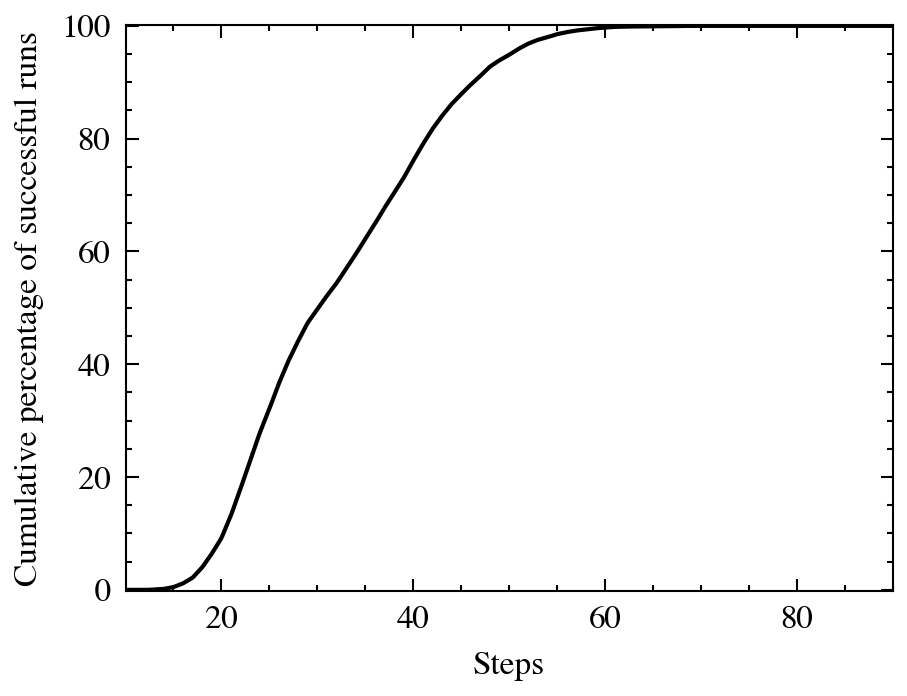

In [45]:
Figure.run_length_distribution(response)

# Tabu Search Run Time Distribution

In [28]:
times = []
energies = []
sampler = tabu.TabuSampler()
repeats = 1000
# Hyperparameters
timeout = 10 # default 20
problem_num = 25

# num_restarts has to be 1 (Towards a Characterisation of the Behaviour of Stochastic Local Search Algorithms for SAT)
# Therefore, use seed hack to simulate multiple runs
for seed in range(1, repeats):
    # Record start time
    start = time.time()
    # Run algorithms
    response =  sampler.sample_qubo(QUBOs[problem_num], seed=seed, timeout=timeout, num_reads=1, num_restarts=1)
    # Record end time and find the difference, which is equivalent to run time
    end = time.time()
    times.append(end - start)
    data = response.data(fields=['energy'])
    energy = next(data).energy
    energies.append(energy)

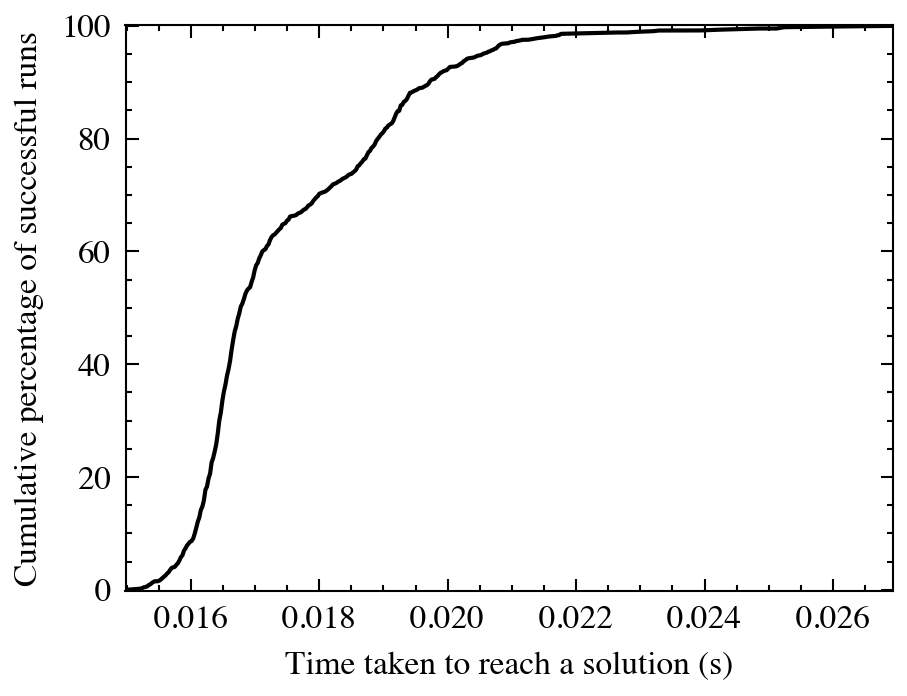

In [46]:
Figure.run_time_distribution(times, energies)

# Save results

In [40]:
data_folder = '../Data/Produced/'
broken_constraints_greedy.to_pickle(data_folder + 'monotone_greedy_broken_constraints.pkl')
broken_constraints_sa.to_pickle(data_folder + 'monotone_sa_broken_constraints.pkl')
broken_constraints_tabu.to_pickle(data_folder + 'monotone_tabu_broken_constraints.pkl')

# Statistical significance

In [64]:
new_energies_sa = energies_sa

In [56]:
old_energies_sa = energies_sa

In [73]:
new_energies_sa

,Energy (minimisation) 0,Energy (minimisation) 1,Energy (minimisation) 2,Energy (minimisation) 3,Energy (minimisation) 4,Energy (minimisation) 5,Energy (minimisation) 6,Energy (minimisation) 7,Energy (minimisation) 8,Energy (minimisation) 9
0,-902.131051,-2141.590319,-836.791027,-1068.257379,-1763.874852,-1475.377804,-2112.100354,-1874.971665,-1281.590319,-2218.397875
1,4730.862069,6060.804598,10192.367816,12637.517241,11076.678161,20567.862069,8396.643678,6560.149425,6507.333333,1848.620690
2,-3217.507014,-2810.909419,-2584.046493,-2754.056112,-988.062926,-2875.351102,-2457.103407,-1848.045691,-2413.351904,-2306.849699
3,-1130.404022,-777.937843,-1236.188300,-1358.720293,-641.279707,-738.703839,-1378.826325,-930.756856,-673.583181,206.925046
4,-2409.998012,-3166.764215,-2964.873161,-1693.217893,-3317.784891,-2295.336382,-2389.109344,-2490.290258,-2623.191650,-2377.018688
5,-3295.432277,-3832.820749,-2412.000000,-3020.600000,-3442.288184,-2752.375793,-1849.429395,-3060.842075,-3336.577522,-3288.933141
6,-2111.843068,-2157.328024,-3109.797050,-860.437758,-2794.000000,-2546.764602,-2600.558112,-3585.919764,-3072.844838,-1968.474926
7,-2943.143953,-3766.274336,-3971.374631,-3570.353982,-3190.282596,-1675.234218,-2947.894985,-3378.329204,-3094.434218,-2687.184071
8,-2907.792325,-3346.986907,-2091.544470,-2853.242889,-3289.448758,-2376.260045,-3725.064560,-2736.237923,980.685327,-2590.589165
9,-3038.496804,-3362.469406,-3165.136986,6979.304110,3475.221005,21242.445662,-3942.113242,-3099.084932,-3322.638356,-3168.582648


In [72]:
old_energies_sa

,Energy (minimisation) 0,Energy (minimisation) 1,Energy (minimisation) 2,Energy (minimisation) 3,Energy (minimisation) 4,Energy (minimisation) 5,Energy (minimisation) 6,Energy (minimisation) 7,Energy (minimisation) 8,Energy (minimisation) 9
0,1064359,930121,1282321,1342006,1745001,1872304,401959,1513352,748674,1228315
1,809123,636792,670356,1078623,550992,613876,934243,2071094,771698,979706
2,777682,814551,1157031,834678,1450204,536447,1649108,1695865,1298578,1459087
3,1269897,2492120,1262772,1655733,1025376,1642915,884698,835206,1614714,1366486
4,1201929,967255,2780615,1811292,1851426,1295248,989566,988282,1712814,1254057
5,1610191,1322709,805087,1236329,1448591,596297,1251753,1156860,736642,1006118
6,1697585,1223121,1780338,965930,861754,1215579,665063,1191297,1122931,599638
7,1052120,1175272,947556,891776,667456,1108824,899728,1240618,855547,1200478
8,2044134,1259946,1285652,786684,1168741,1191944,1949622,1748498,1156574,1081028
9,1010243,1992693,1535954,1428919,1372386,1351293,1565095,1721470,1564152,1339040


In [65]:
import scipy.stats as stats

In [69]:
new_energies_sa.iloc[0]

Energy (minimisation) 0    -902.131051
Energy (minimisation) 1   -2141.590319
Energy (minimisation) 2    -836.791027
Energy (minimisation) 3   -1068.257379
Energy (minimisation) 4   -1763.874852
Energy (minimisation) 5   -1475.377804
Energy (minimisation) 6   -2112.100354
Energy (minimisation) 7   -1874.971665
Energy (minimisation) 8   -1281.590319
Energy (minimisation) 9   -2218.397875
Name: 0, dtype: float64

In [71]:
old_energies_sa.iloc[0]

Energy (minimisation) 0    1064359
Energy (minimisation) 1     930121
Energy (minimisation) 2    1282321
Energy (minimisation) 3    1342006
Energy (minimisation) 4    1745001
Energy (minimisation) 5    1872304
Energy (minimisation) 6     401959
Energy (minimisation) 7    1513352
Energy (minimisation) 8     748674
Energy (minimisation) 9    1228315
Name: 0, dtype: int64

In [70]:
stats.ttest_ind(new_energies_sa.iloc[0], old_energies_sa.iloc[0])

Ttest_indResult(statistic=-8.575018150805937, pvalue=8.994725044770677e-08)

# new

In [153]:
def verma_penalty(qubo_obj):
        weights = np.zeros(shape = (len(qubo_obj) * 2), dtype='int64')
        k = 0
        for i in range(len(qubo_obj)):
            weights[k]= qubo_obj[i][i]
            weights[k+1]= -qubo_obj[i][i]
            for j in range(len(qubo_obj)):
                if(i!=j):
                    if(qubo_obj[i][j] > 0):
                        weights[k]+= qubo_obj[i][j]
                    else:
                        weights[k+1]-=qubo_obj[i][j]
            k = k+2
        return min(weights)

In [32]:
def new_penalty(qubo_obj, con_obj):
        weights_obj = np.zeros(shape = (len(qubo_obj) * 2), dtype='int64')
        k = 0
        
        for i in range(len(qubo_obj)):
            weights_obj[k]= qubo_obj[i][i]
            weights_obj[k+1]= -qubo_obj[i][i]
            for j in range(len(qubo_obj)):
                if(i!=j):
                    if(qubo_obj[i][j] > 0):
                        weights_obj[k]+= qubo_obj[i][j]
                    else:
                        weights_obj[k+1]-=qubo_obj[i][j]
            k = k+2
            
        weights_con = np.zeros(shape = (len(con_obj) * 2), dtype='int64')
        k = 0
        
        for i in range(len(con_obj)):
            weights_con[k]= con_obj[i][i]
            weights_con[k+1]= -con_obj[i][i]
            for j in range(len(con_obj)):
                if(i!=j):
                    if(con_obj[i][j] > 0):
                        weights_con[k]+= con_obj[i][j]
                    else:
                        weights_con[k+1]-=con_obj[i][j]
            k = k+2
        
        return max(weights_obj)/min(weights_con[weights_con > 0])